# barplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Столбчатые диаграммы позволяют визуализировать данные, представляя категории в виде столбцов, длина которых пропорциональна значениям, соответствующим этим категориям. В *seaborn* столбчатая диаграмма строится с использованием функции `sns.barplot()`.

Основные параметры функции `sns.barplot()`:
- `data`: DataFrame или массив, содержащий данные для построения графика;
- `x`: название переменной или вектор данных для оси X;
- `y`: название переменной или вектор данных для оси Y;
- `hue`: название переменной или вектор данных, определяющий расцветку столбцов;
- `order`: упорядоченный список уникальных значений для оси X (если нужно задать определённый порядок столбцов);
- `hue_order`: упорядоченный список уникальных значений для переменной hue;
- `estimator`: функция для вычисления значений по категориям. По умолчанию np.mean. Можно использовать такие функции, как np.sum, np.median и т.д.;
- `errorbar`: функция или параметр для вычисления ошибки. Поддерживает значения sd (стандартное отклонение), ci (интервал доверия), pi (предсказательный интервал) и пользовательские функции;
- `color`: цвет столбцов;
- `palette`: палитра цветов для переменной hue;
- `saturation`: степень насыщенности цвета столбцов. Значение по умолчанию = 0.75;
- `width`: задает относительную ширину столбцов. Значение по умолчанию = 0.8;
- `dodge`: логическое значение, определяющее, будут ли столбцы разных категорий hue расположены рядом (если True) или наложены друг на друга (если False).

Рассматривать примеры использования функции `sns.barplot()` будем на данных из датасета penguins:

In [3]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датасет **penguins** содержит следующие столбцы:
- `'species'` - вид пингвина (Adelie, Chinstrap, Gentoo);
- `'island'` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `'bill_length_mm'` - длина клюва в миллиметрах;
- `'bill_depth_mm'` - глубина клюва в миллиметрах;
- `'flipper_length_mm'` - длина ласт в миллиметрах;
- `'body_mass_g'` - масса тела в граммах;
- `'sex'` - пол пингвина (Male, Female).

Для начала сделаем стиль отображения диаграмм - белый с линиями сетки:

In [5]:
sns.set_style('whitegrid')

Построим диаграмму, где по оси абсцисс будут располагаться виды пингвинов, а по оси ординат - масса тела в граммах:

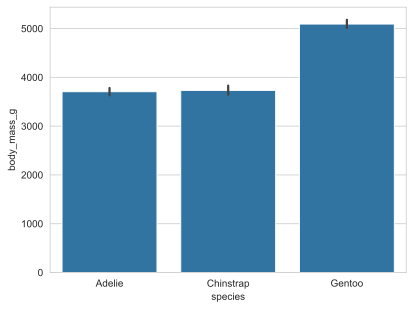

In [6]:
sns.barplot(data=penguins, x='species', y='body_mass_g');

*Seaborn* автоматически агрегирует данные по заданным категориям, вычисляя средние значения (по умолчанию) или другие статистические показатели для каждой группы. Также, по умолчанию, отобразились доверительные интервалы в виде чёрных чёрточек на вершине каждого столбца.

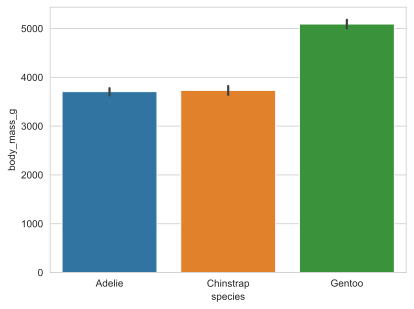

In [7]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            hue='species');

Теперь каждая категория данных имеет свой индивидуальный цвет.

Для горизонтального отображения столбцов, поменяем местами переменные, указанные в параметрах `x` и `y`:

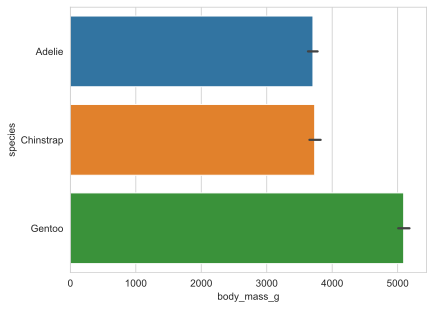

In [8]:
sns.barplot(data=penguins, x='body_mass_g', y='species', 
            hue='species');

Параметром `palette` поменяем цветовую гамму нашей диаграммы:

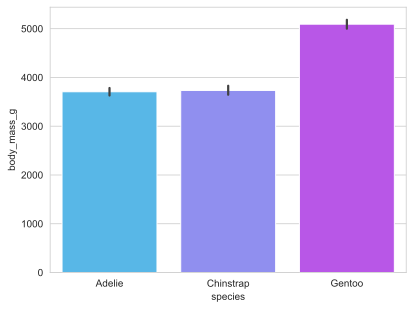

In [9]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            hue='species',
            palette='cool');

**Параметр width**

Управление шириной столбца в `sns.barplot()` осуществляется при помощью параметра `width`. Этот параметр задает относительную ширину столбцов и принимает значения от 0 до 1, где 1 соответствует максимальной ширине, а 0 - минимальной (практически невидимой).

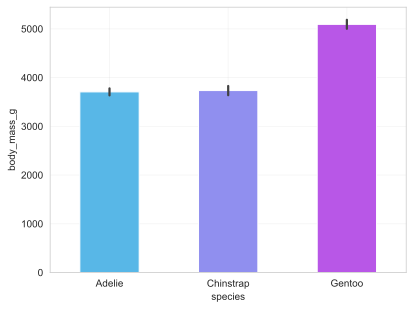

In [10]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            hue='species',
            palette='cool',
            width=0.5)

plt.grid(alpha=0.2);

**Параметр estimator**

Параметр `estimator` в функции `sns.barplot()` определяет функцию или метод, который будет применен для агрегирования значений по категориям. По умолчанию `estimator` установлен на *mean*, что означает, что `sns.barplot()` будет вычислять средние значения для каждой категории. Однако можно использовать другие агрегирующие функции, такие как медиана, сумма, количество наблюдений, стандартное отклонение и т.д.

Для примера построим диаграмму по максимальной массе тела, которая встречается в данном датафрейме у представителей каждого вида пингвинов:

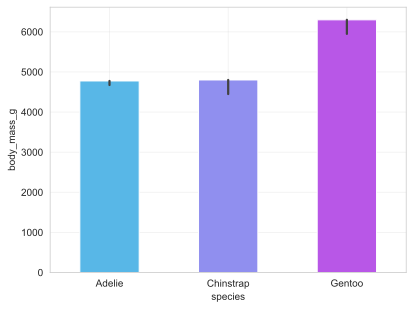

In [11]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            estimator=np.max)

plt.grid(alpha=0.3);

В данном примере мы передали параметру `estimator` функцию библиотеки *NumPy* - `np.max`. Возможно также использовать и другое написание атрибута, заключив его в кавычки. Например, построим диаграмму, используя такую статистику как стандартное отклонение (`'std'`):

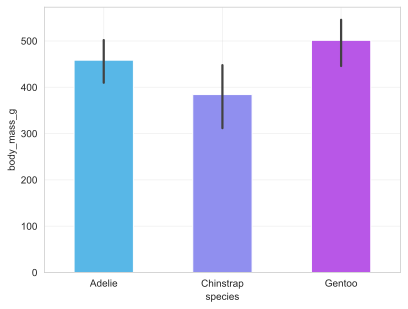

In [12]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            estimator='std')

plt.grid(alpha=0.3);

Можно проверить, правильно ли отображаются данные на графике. Для этого посчитаем статистики по массе тела и по видам пингвинов:

In [13]:
penguins.groupby(by='species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


**Параметр errorbar**

Параметр `errorbar` функции `sns.barplot()` используется для настройки отображения ошибок (error bars) на столбчатой диаграмме. Эти ошибки могут представлять различные статистические параметры, такие как стандартное отклонение, стандартная ошибка или доверительный интервал. Этот параметр позволяет указать, какой тип ошибки и как именно её отображать на графике.

Возможные атрибуты:
- `errorbar='ci'`: по умолчанию, barplot отображает 95%-й доверительный интервал;
- `errorbar='sd'`: отображает стандартное отклонение значений;
- `errorbar='se'`: отображает стандартную ошибку значений;
- `errorbar=None`: отключает отображение ошибок.

Например, отобразим на графике стандартную ошибку среднего:

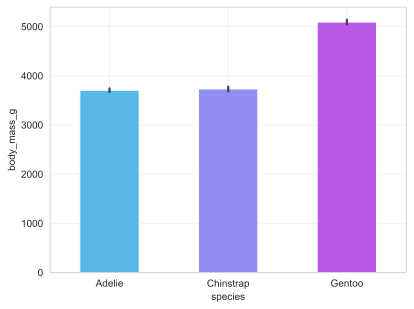

In [14]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar='se')

plt.grid(alpha=0.3);

Или вовсе уберём отображение ошибки:

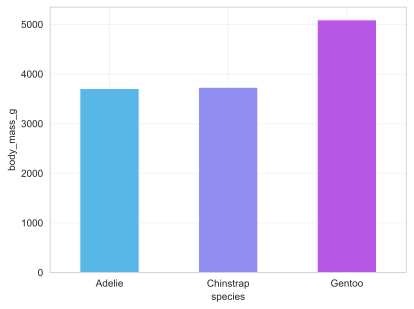

In [15]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar=None)

plt.grid(alpha=0.3);

**Параметр hue**

Как и в других функциях библиотеки *seaborn*, параметр `hue` в функции `sns.barplot()` позволяет разделять данные по категориям и окрашивать столбцы на графике в зависимости от значений этой категориальной переменной.

Для примера разделим пингвинов по полу на диаграмме:

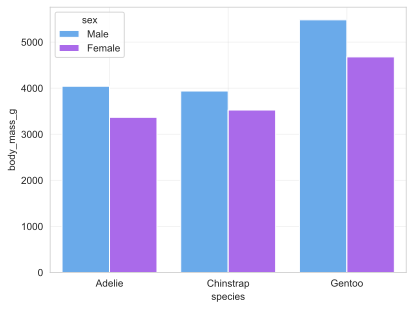

In [16]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            palette='cool',
            errorbar=None,
            hue='sex')

plt.grid(alpha=0.3);

Или сделаем эту же диаграмму, но в горизонтальном отображении:

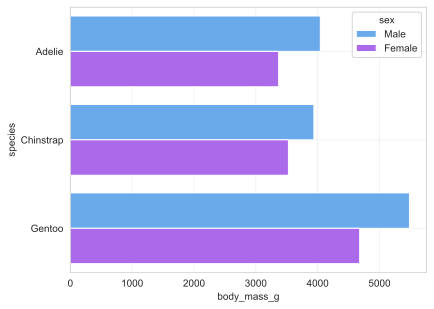

In [17]:
sns.barplot(data=penguins, x='body_mass_g', y='species',
            palette='cool',
            errorbar=None,
            hue='sex')

plt.grid(alpha=0.3);

**Параметр hue_order**

Параметр `hue_order` функции `sns.barplot()` используется для определения порядка категорий при использовании параметра `hue`.

На предыдущей диаграмме автоматически сначала отобразились столбцы с данными по самцам, а затем показываются столбцы с данными по самкам. При помощи параметра `hue_order` поменяем расположение столбцов:

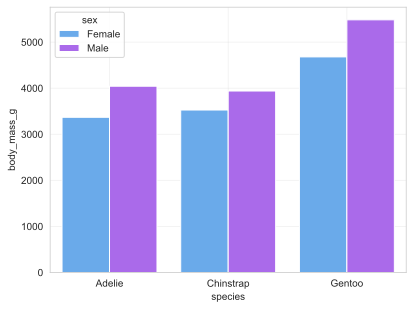

In [18]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            palette='cool',
            errorbar=None,
            hue='sex',
            hue_order=['Female', 'Male'])

plt.grid(alpha=0.3);

Теперь сначала отображаются столбцы с данными по самкам.

**Параметр order**

Библиотека *seaborn* также предоставляет возможность изменить порядок расположения категорий, откладываемых по осям `X` или `Y`. В данном случае параметру `order` передается список с категориями, который будет определять порядок расположения этих категорий на осях. 

Например, сделаем следующий порядок отображения видов пингвинов на оси абсцисс: 'Gentoo', 'Chinstrap', 'Adelie':

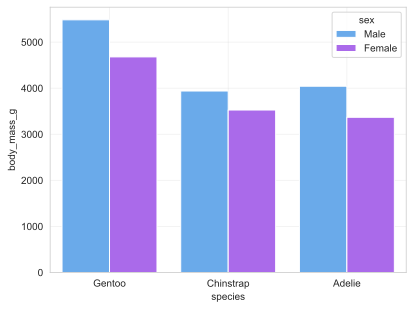

In [19]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            palette='cool',
            errorbar=None,
            hue='sex',
            order=['Gentoo', 'Chinstrap', 'Adelie'])

plt.grid(alpha=0.3);

**Параметр dodge**

Параметр `dodge` определяет, будут ли столбцы категорий `hue` сгруппированы рядом друг с другом (`dodge=True`) или наложены друг на друга (`dodge=False`). По умолчанию `dodge=True`.

Для примера сделаем применение параметра `hue` с наложением столбцов:

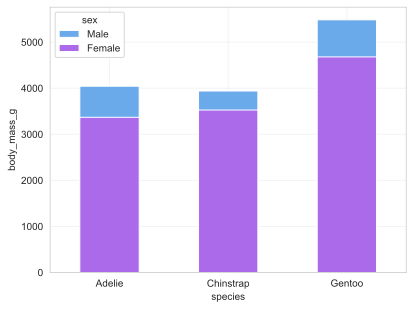

In [20]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            palette='cool',
            errorbar=None,
            hue='sex',
            dodge=False)

plt.grid(alpha=0.3);

Как видим, теперь столбцы по полу пингвинов наложены друг на друга.

**Параметр saturation**

Параметр `saturation` в функции `sns.barplot()` контролирует интенсивность цвета столбцов. Он принимает значения в диапазоне от 0 (бледный, серый цвет) до 1 (полная насыщенность цвета). По умолчанию принимает значение 0.75.

График со значением по умолчанию (`saturation=0.75`):

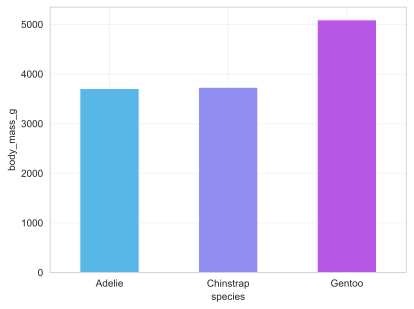

In [21]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar=None)

plt.grid(alpha=0.3);

График со значением `saturation=1`:

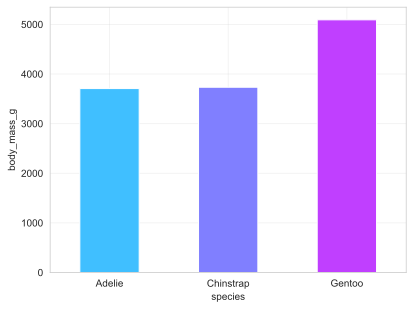

In [22]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar=None,
            saturation=1)

plt.grid(alpha=0.3);

График со значением `saturation=0.5`:

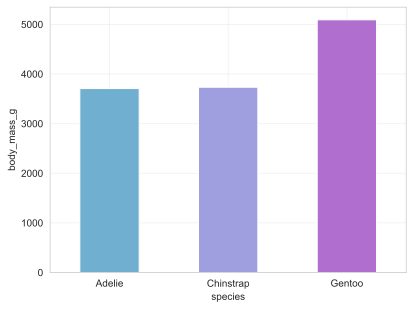

In [23]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar=None,
            saturation=0.5)

plt.grid(alpha=0.3);

Если параметр `saturation` отвечает за насыщенность цвета, то параметр `alpha` добавляет прозрачности цвету. Для примера построим предыдущий график с параметром `alpha=0.5`:

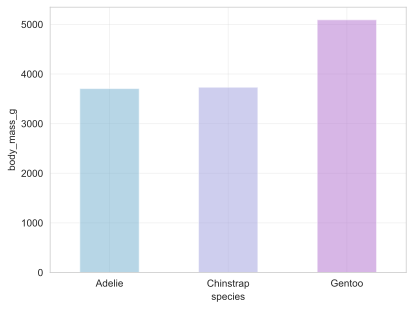

In [24]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            hue='species', 
            palette='cool',
            errorbar=None,
            saturation=0.5,
            alpha=0.5)

plt.grid(alpha=0.3);

**Параметр color**

Параметр `color` позволяет задать цвет для всех столбцов на графике.

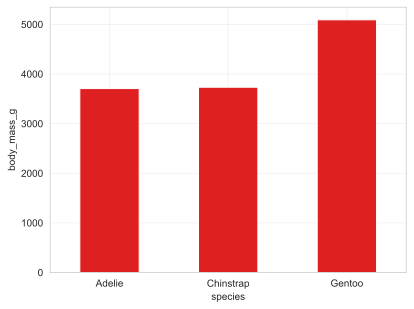

In [26]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            errorbar=None,
            color='red')

plt.grid(alpha=0.3);

**Параметр edgecolor**

Параметр `edgecolor` функции `sns.barplot()` задаёт цвет границы (обводки) для всех столбцов на графике.

Например, сделаем границы столбцов графика серого цвета:

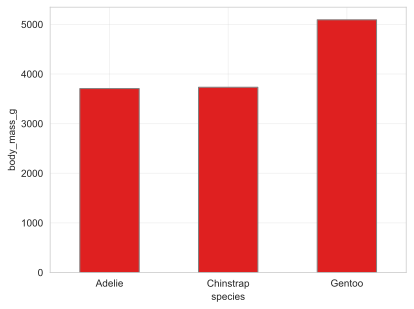

In [27]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            color='red',
            errorbar=None,
            edgecolor='grey')

plt.grid(alpha=0.3);

**Параметр linewidth**

Параметр `linewidth` позволяет задать толщину границы для всех столбцов на графике.

Сделаем линию обводки столбцов пошире:

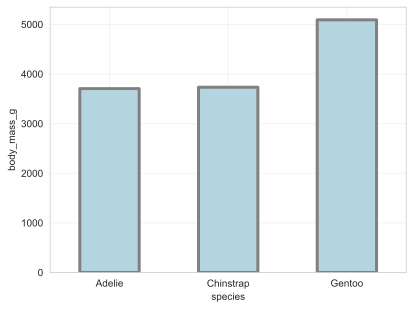

In [29]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            color='lightblue',
            errorbar=None,
            edgecolor='grey',
            linewidth=3)

plt.grid(alpha=0.3);


**Параметр fill**

Этот параметр определяет, будут ли столбцы залиты цветом (`fill=True`) или оставаться пустыми, показывая только границы (`fill=False`). По умолчанию `fill=True`.

Для примера уберём заливку столбцов:

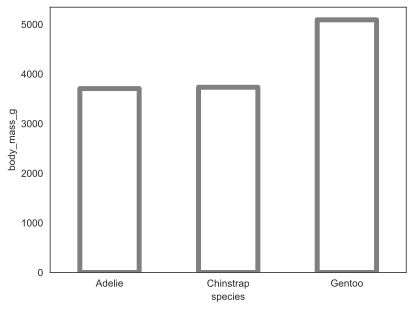

In [32]:
sns.set_style('white')

sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            errorbar=None,
            edgecolor='grey',
            linewidth=5,
            fill=False);

**Параметр err_kws**

Параметр `err_kws` в функции `sns.barplot()` позволяет настраивать внешний вид полосок ошибок на графике. Этому параметру передаётся словарь с параметрами для форматирования полосок ошибок.

Например, поменяем цвет полосок на красный и сделаем из шире:

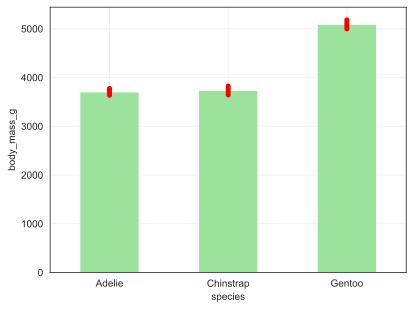

In [33]:
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            color='lightgreen',
            err_kws={'color': 'red', 'linewidth': 5})

plt.grid(alpha=0.3);